<a href="https://colab.research.google.com/github/nbkwon/ml-assignment/blob/master/ml_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Assignment 1 - 1
# Generate Data Input data and plotting it.

In [0]:
# we now need pyplot for plotting data
import matplotlib.pyplot as pyplot
def show_plot(download_file = False):
    pyplot.show()
    if download_file == False:
       return
    
    import google.colab
    file_name = "test.png"
    pyplot.savefig(file_name)
    google.colab.files.download(file_name)

def make_plot(plot_data_list):
    # it's too samll. make bigger.
    pyplot.figure(figsize=(50, 25))

    for data_dic, plot_type, color in plot_data_list:
        if plot_type is "plot":
            pyplot.plot(list(data_dic.keys()), list(data_dic.values()), c=color)
        if plot_type is "scatter":
            pyplot.scatter(list(data_dic.keys()), list(data_dic.values()), c=color)

 calc_energy_value 함수는 다음 식을 처리한다.
 $$\frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

calc_cost_sum_for_gradient_descent 함수는 다음 두 식을 처리한다.
$$\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$$
$$\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$$


In [0]:
# we need numpy for normal distribution random number.
import numpy

# ax + b 형식의 식의 결과를 반환해주는 함수
def get_y_by_linear(a, b, x):
    return (a * x) + b

# 
def calc_energy_value(theta_pair, data_dic):
    ret = 0

    m = len(data_dic)

    for x, y_in_data in data_dic.items():
        # hθ(x) =θ0 + θ1 * x
        calc_y = get_y_by_linear(theta_pair[1], theta_pair[0], x)
        calc_result = calc_y - y_in_data

        # 제곱을 처리
        ret = ret + (calc_result * calc_result)

    return ret / (m * 2)
    
# Gradient Descent를 위해 cost function을 변형한 식
def calc_cost_sum_for_gradient_descent(theta_pair, data_dic, will_multiply_x):
    ret = 0

    m = len(data_dic)

    for x, y_in_data in data_dic.items():
        # hθ(x) =θ0 + θ1 * x
        calc_y = get_y_by_linear(theta_pair[1], theta_pair[0], x)
        calc_result = calc_y - y_in_data
        if will_multiply_x:
            calc_result = calc_result * x

        ret = ret + calc_result

    return ret / m
    
def next_gradient_descent_step(step_size, theta_pair, data_dic):
    next_theta_0 = theta_pair[0] - step_size * calc_cost_sum_for_gradient_descent(theta_pair, data_dic, False)
    next_theta_1 = theta_pair[1] - step_size * calc_cost_sum_for_gradient_descent(theta_pair, data_dic, True)

    return next_theta_0, next_theta_1
    
def check_convergence(theta_pair, new_theta_pair):
    # float 형의 자료형 동일한지 판단을 위해 numpy의 isclose를 사용.
    atol = 0.0001
    return numpy.isclose(theta_pair[0], new_theta_pair[0], atol=atol) and numpy.isclose(theta_pair[1], new_theta_pair[1], atol=atol)

In [0]:
# linear regression by Gradient Descent

# number of point pairs
count_of_samples = 100

# linear_function = ax + b
linear_factor_a = 5
linear_factor_b = 10

# N(0, a^2)
normal_distribution_location = 0
normal_distribution_scale = 20

numbers_by_normal_distribution = numpy.random.normal(
    loc = normal_distribution_location,
    scale = normal_distribution_scale,
    size = count_of_samples)

x_to_y_hat = {}
x_to_y_with_n = {}

# make point pairs to be plotted.
for x, n in zip(range(count_of_samples), numbers_by_normal_distribution):
    y_hat = get_y_by_linear(linear_factor_a, linear_factor_b, x)
    y_with_n = y_hat + n

    x_to_y_hat[x] = y_hat
    x_to_y_with_n[x] = y_with_n


[Plotting the results] - Input data [2pt]

theta_0 : 10, theta_1 : 5


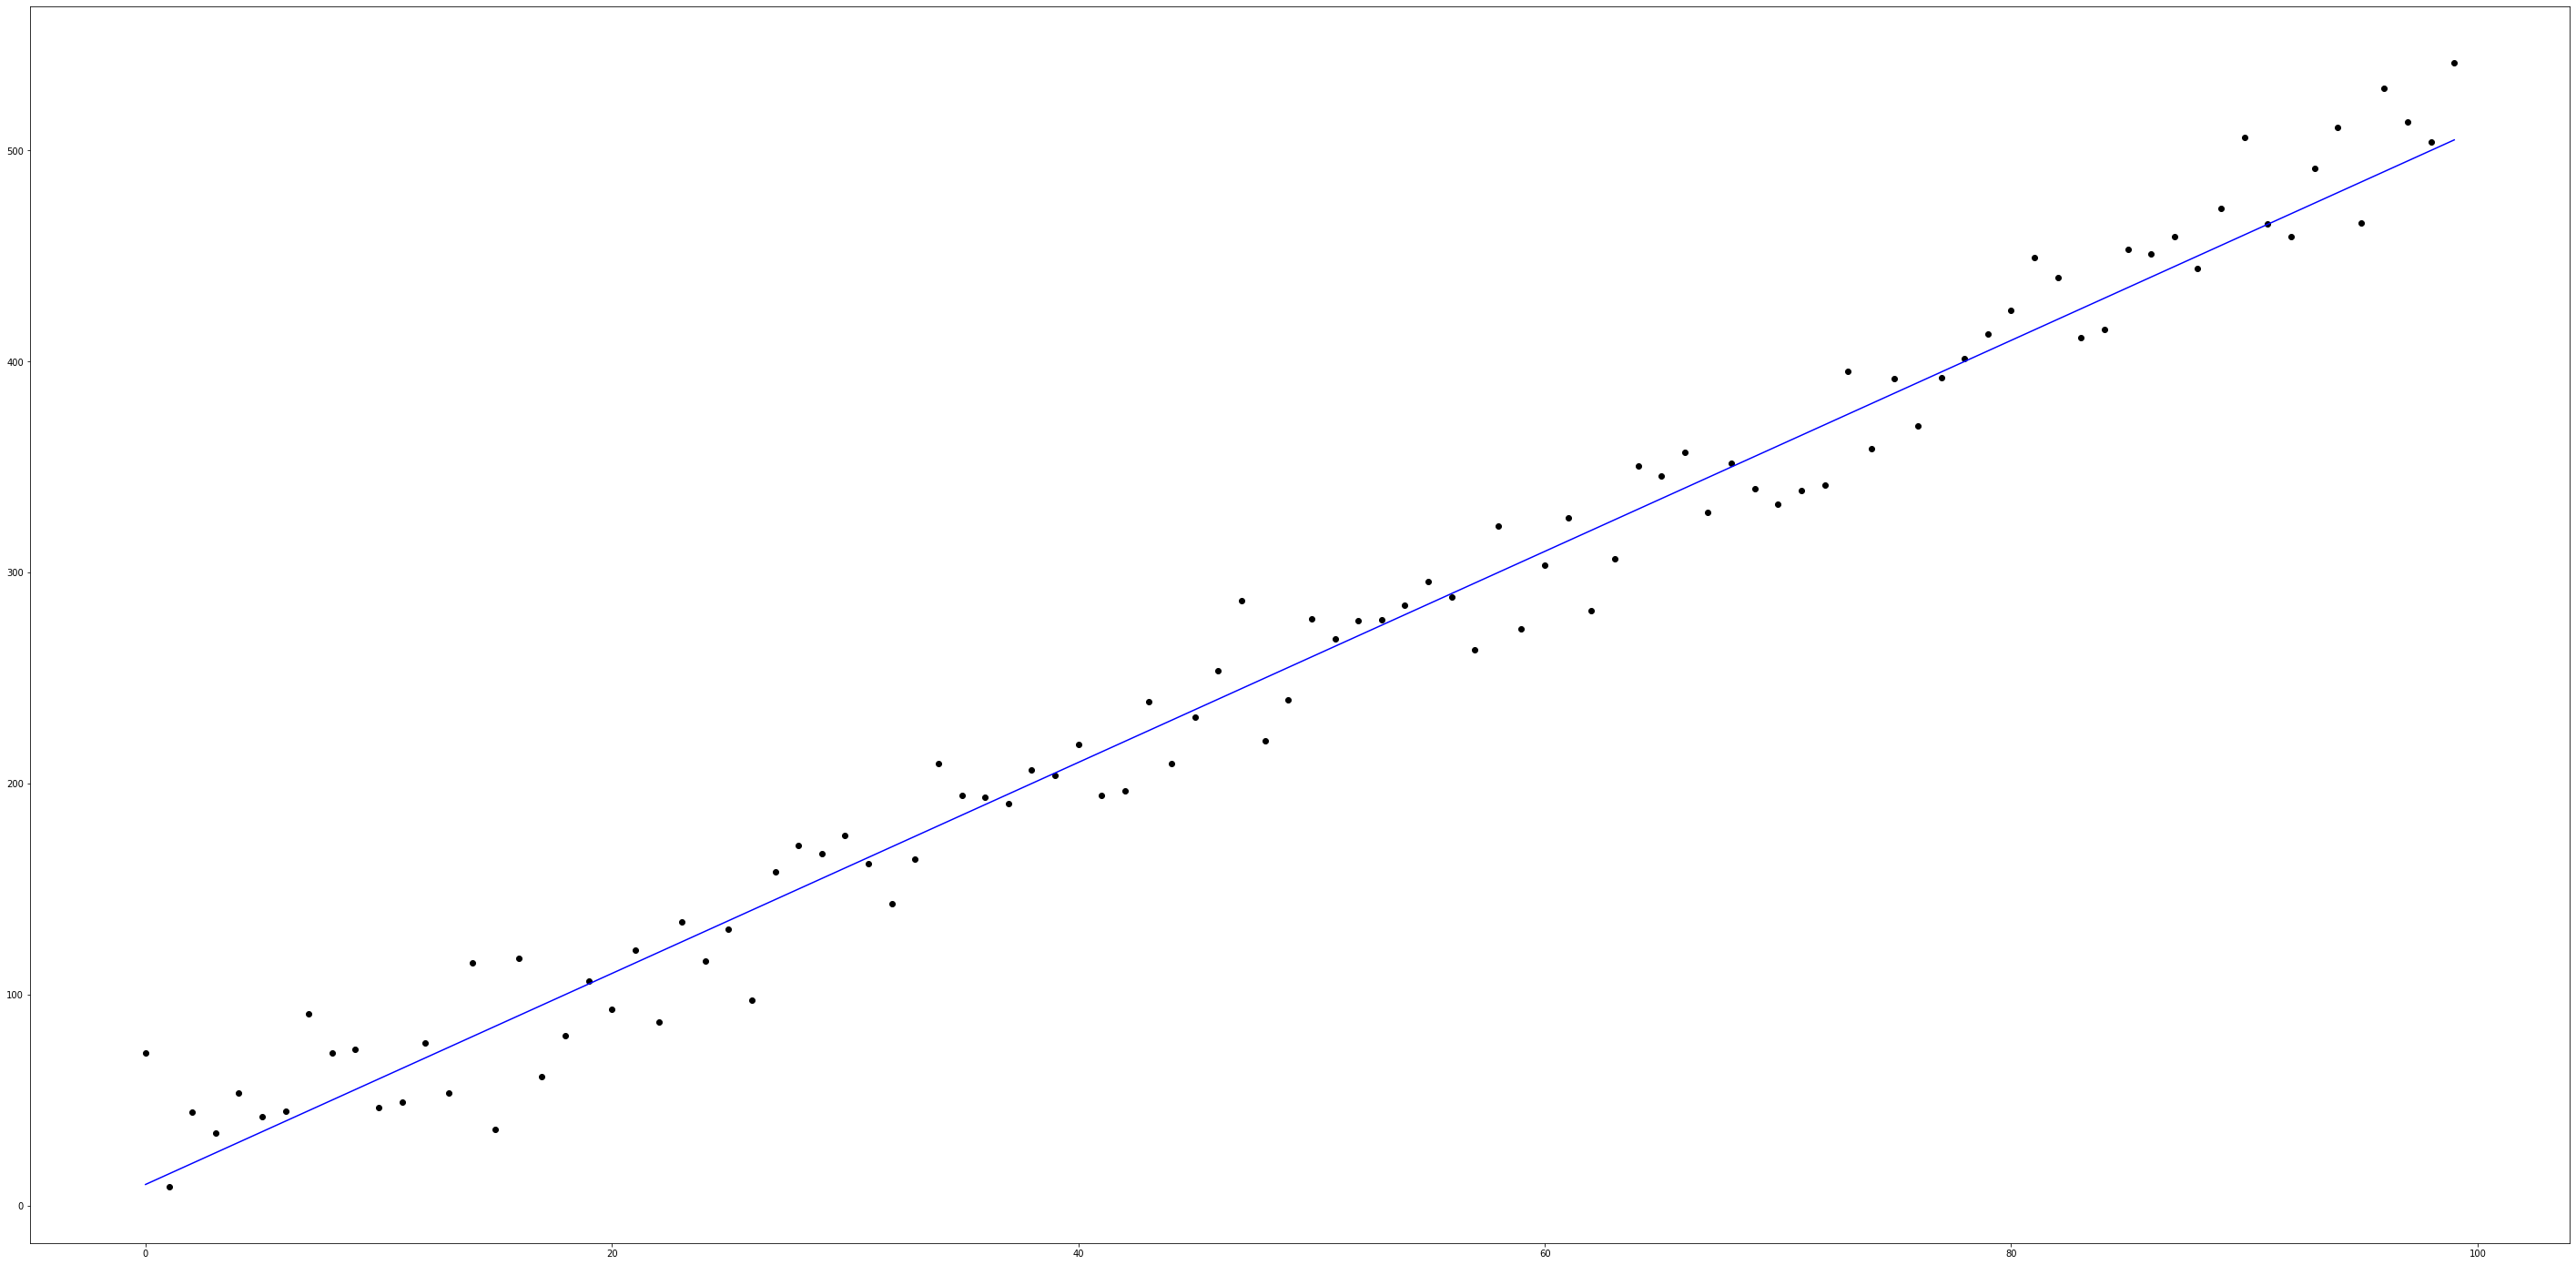

In [0]:
print(f"theta_0 : {linear_factor_b}, theta_1 : {linear_factor_a}")
make_plot([(x_to_y_hat, "plot", "blue"), (x_to_y_with_n, "scatter", "black")])
show_plot()

In [0]:
current_theta_pair = (20, 7)


step_size = 0.0001

step_count = 0

step_count_to_energy_value = {step_count: calc_energy_value(current_theta_pair, x_to_y_with_n)}
step_count_to_theta_0 = {step_count: current_theta_pair[0]}
step_count_to_theta_1 = {step_count: current_theta_pair[1]}

while(True):
    step_count = step_count + 1
    next_theta_pair = next_gradient_descent_step(step_size, current_theta_pair, x_to_y_with_n)
    
    step_count_to_energy_value[step_count] = calc_energy_value(next_theta_pair, x_to_y_with_n)
    step_count_to_theta_0[step_count] = next_theta_pair[0]
    step_count_to_theta_1[step_count] = next_theta_pair[1]
    
    if check_convergence(current_theta_pair, next_theta_pair):
        break 
    
    current_theta_pair = next_theta_pair

    
# make point pairs to be plotted.
solution_by_linear_regression_plot = {}
for x in range(count_of_samples):
    y_hat = get_y_by_linear(current_theta_pair[1], current_theta_pair[0], x)

    solution_by_linear_regression_plot[x] = y_hat

# show calculated theta
print("current_theta_pair", current_theta_pair)

current_theta_pair (19.962831574501358, 4.887901796501034)


[Plotting the results] - Output results [2pt]

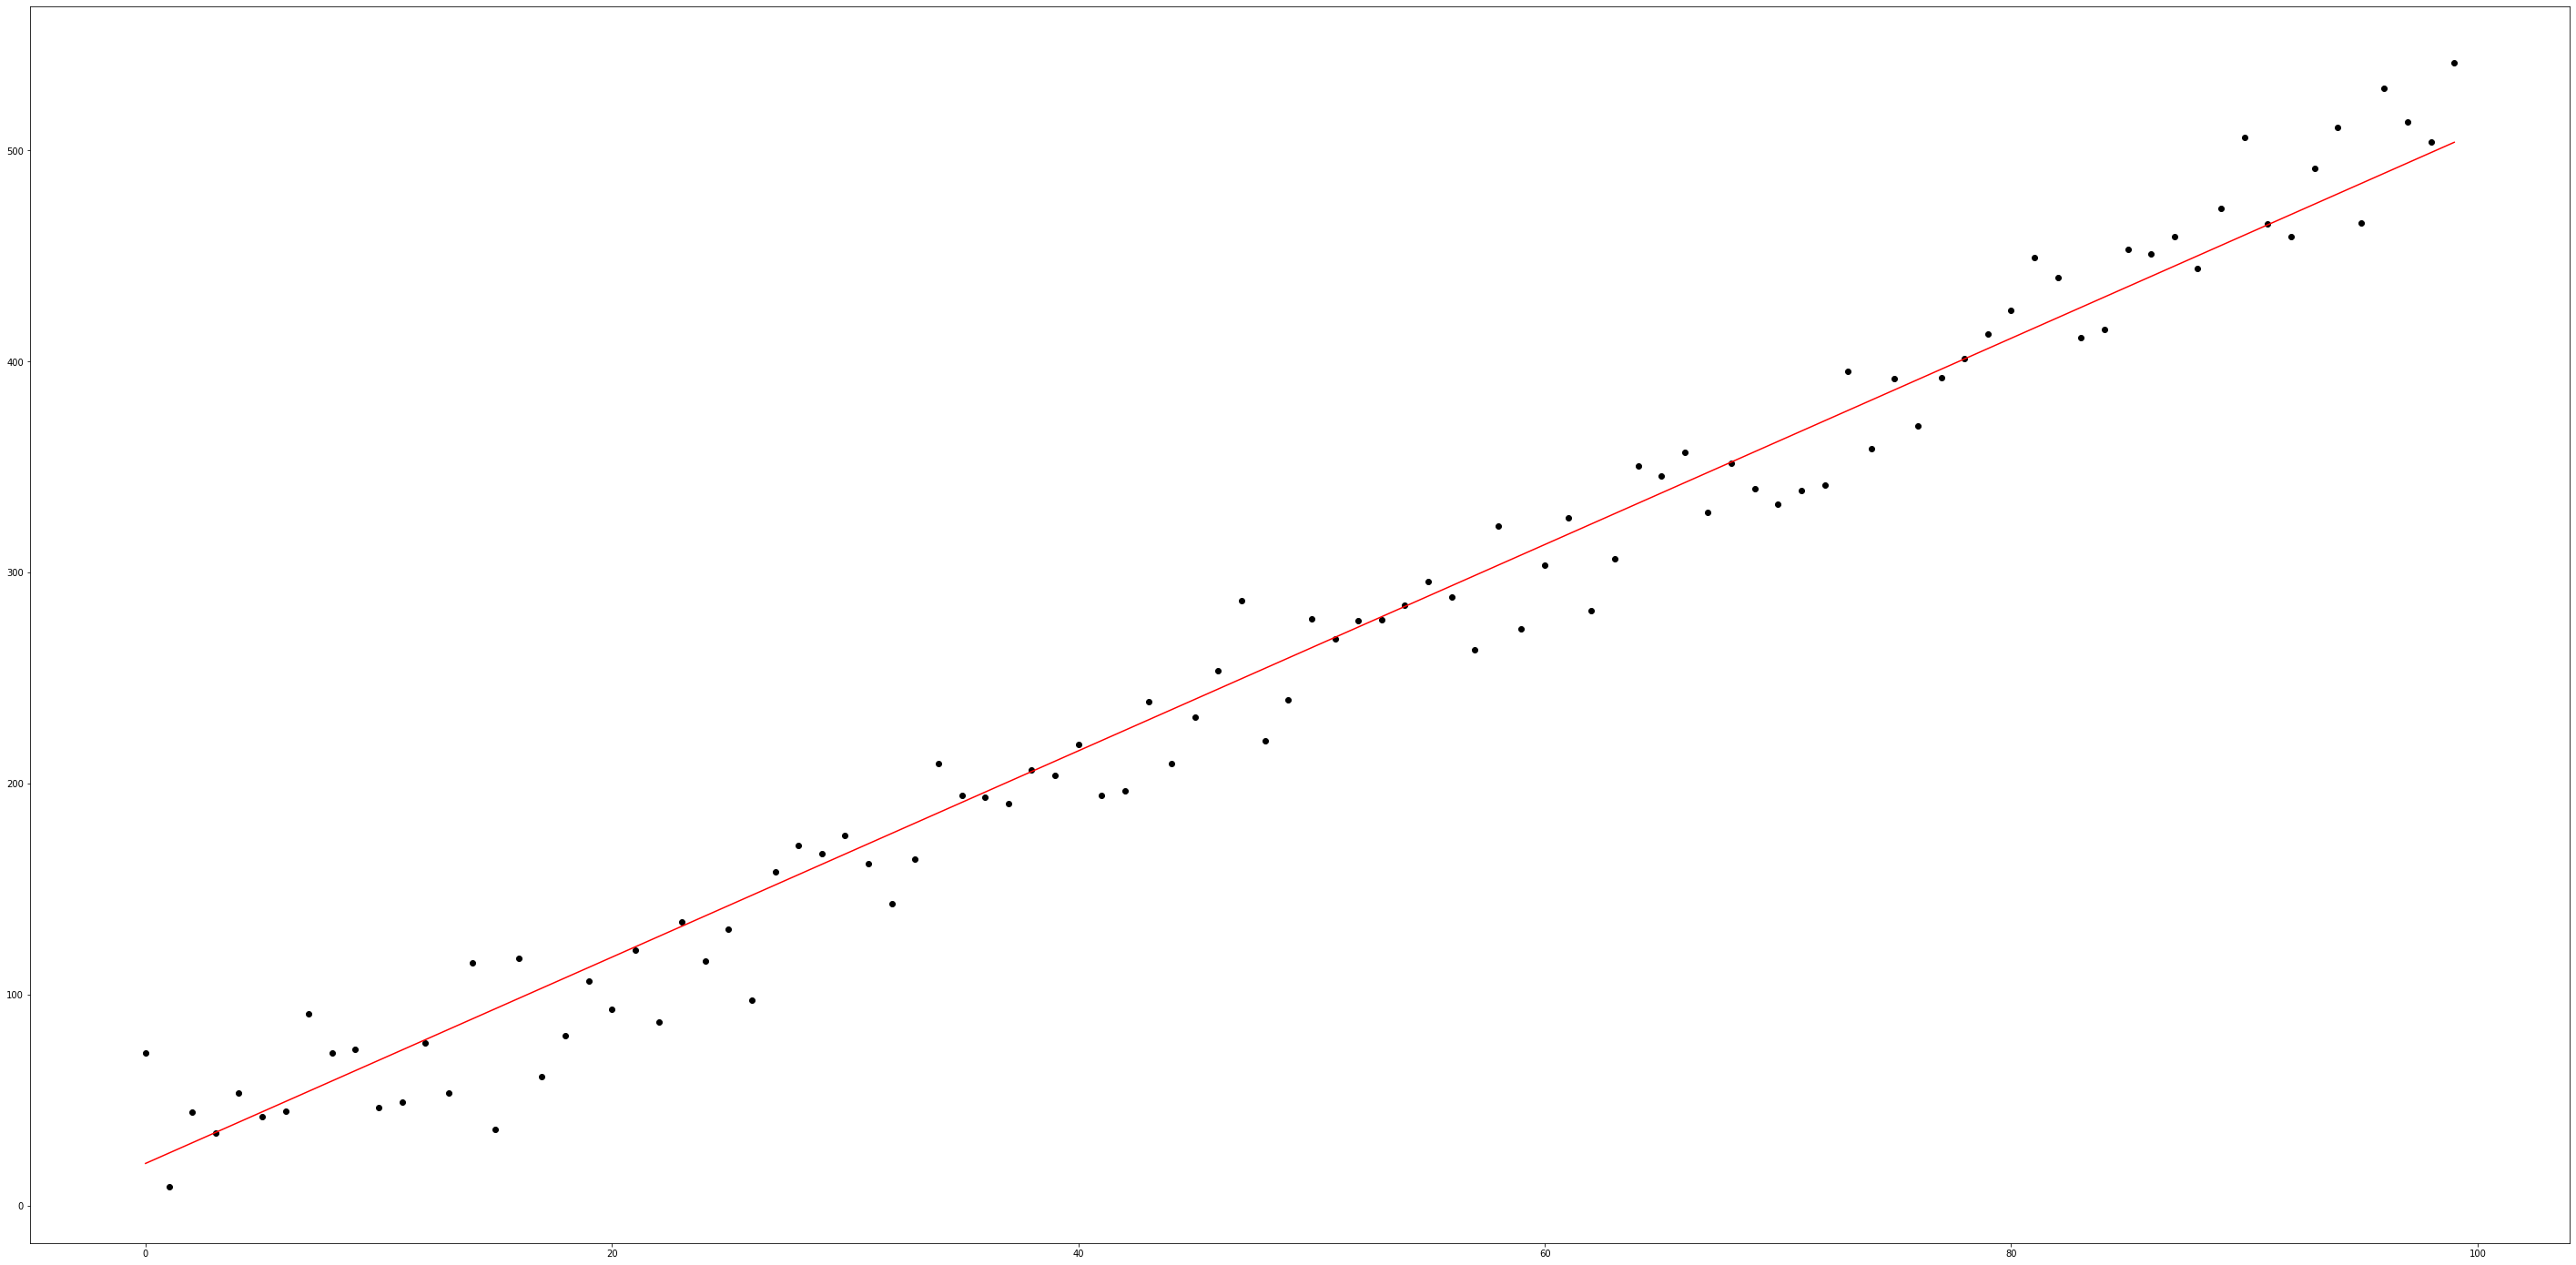

In [0]:
make_plot([(solution_by_linear_regression_plot, "plot", "red"), (x_to_y_with_n, "scatter", "black")])
show_plot()

[Plotting the results] - Plotting the energy values [2pt]

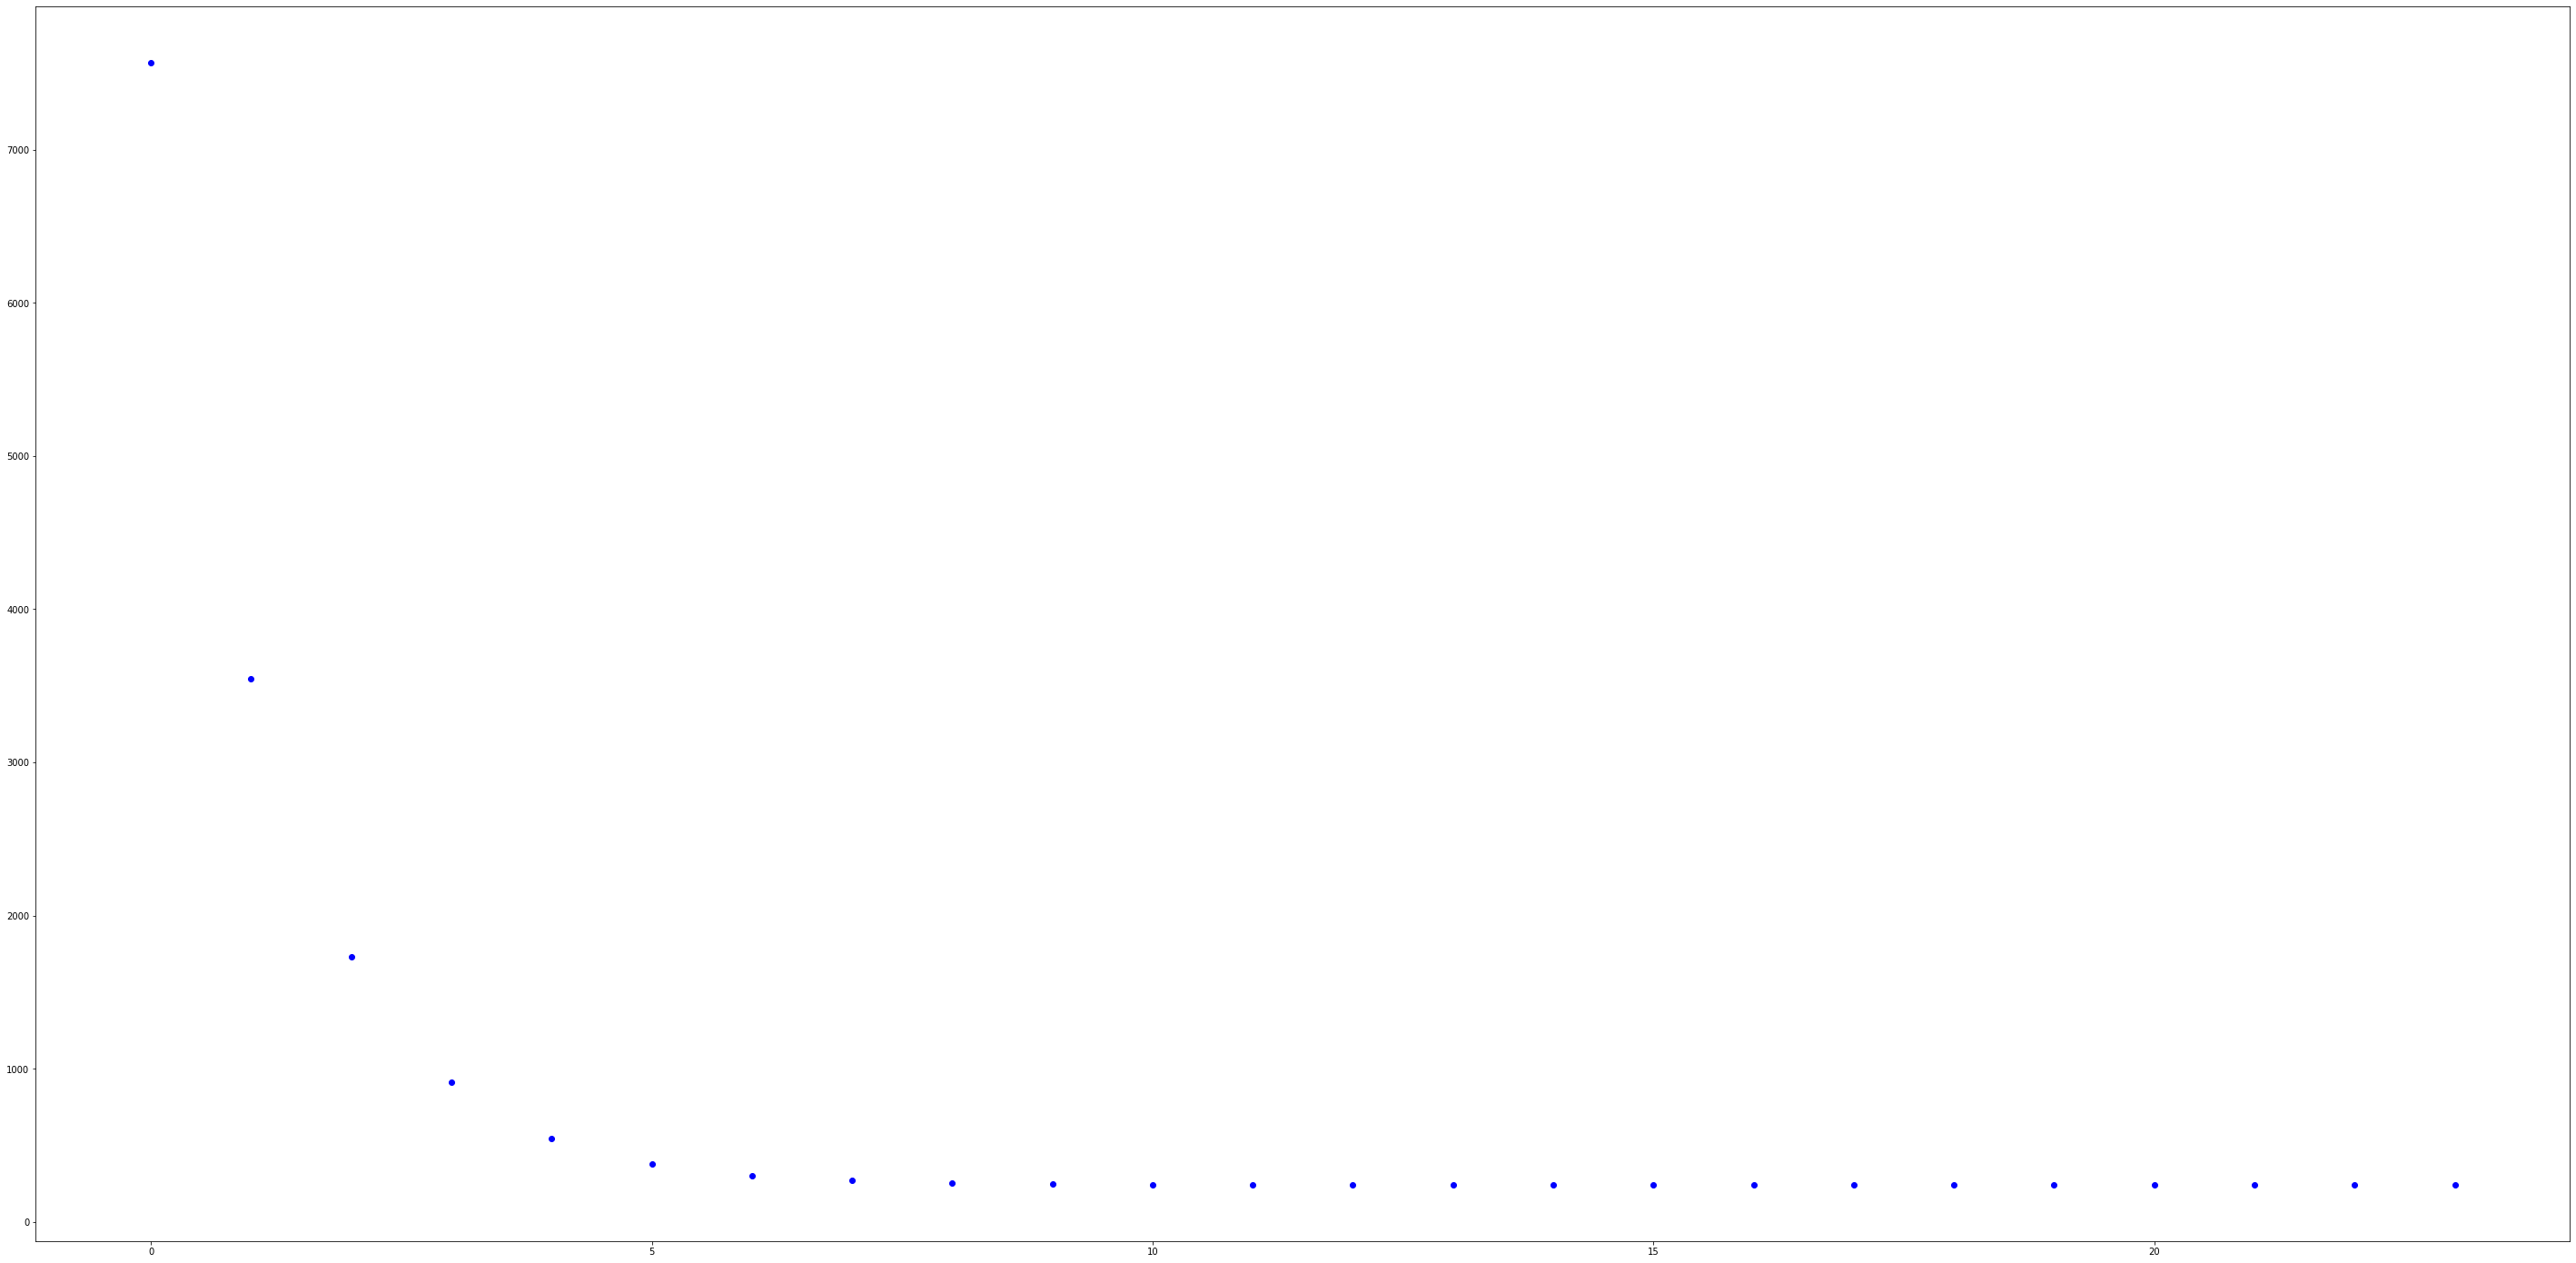

In [0]:
make_plot([(step_count_to_energy_value, "scatter", "blue")])
show_plot()

[Plotting the results] - Plotting the model parameters [2pt]

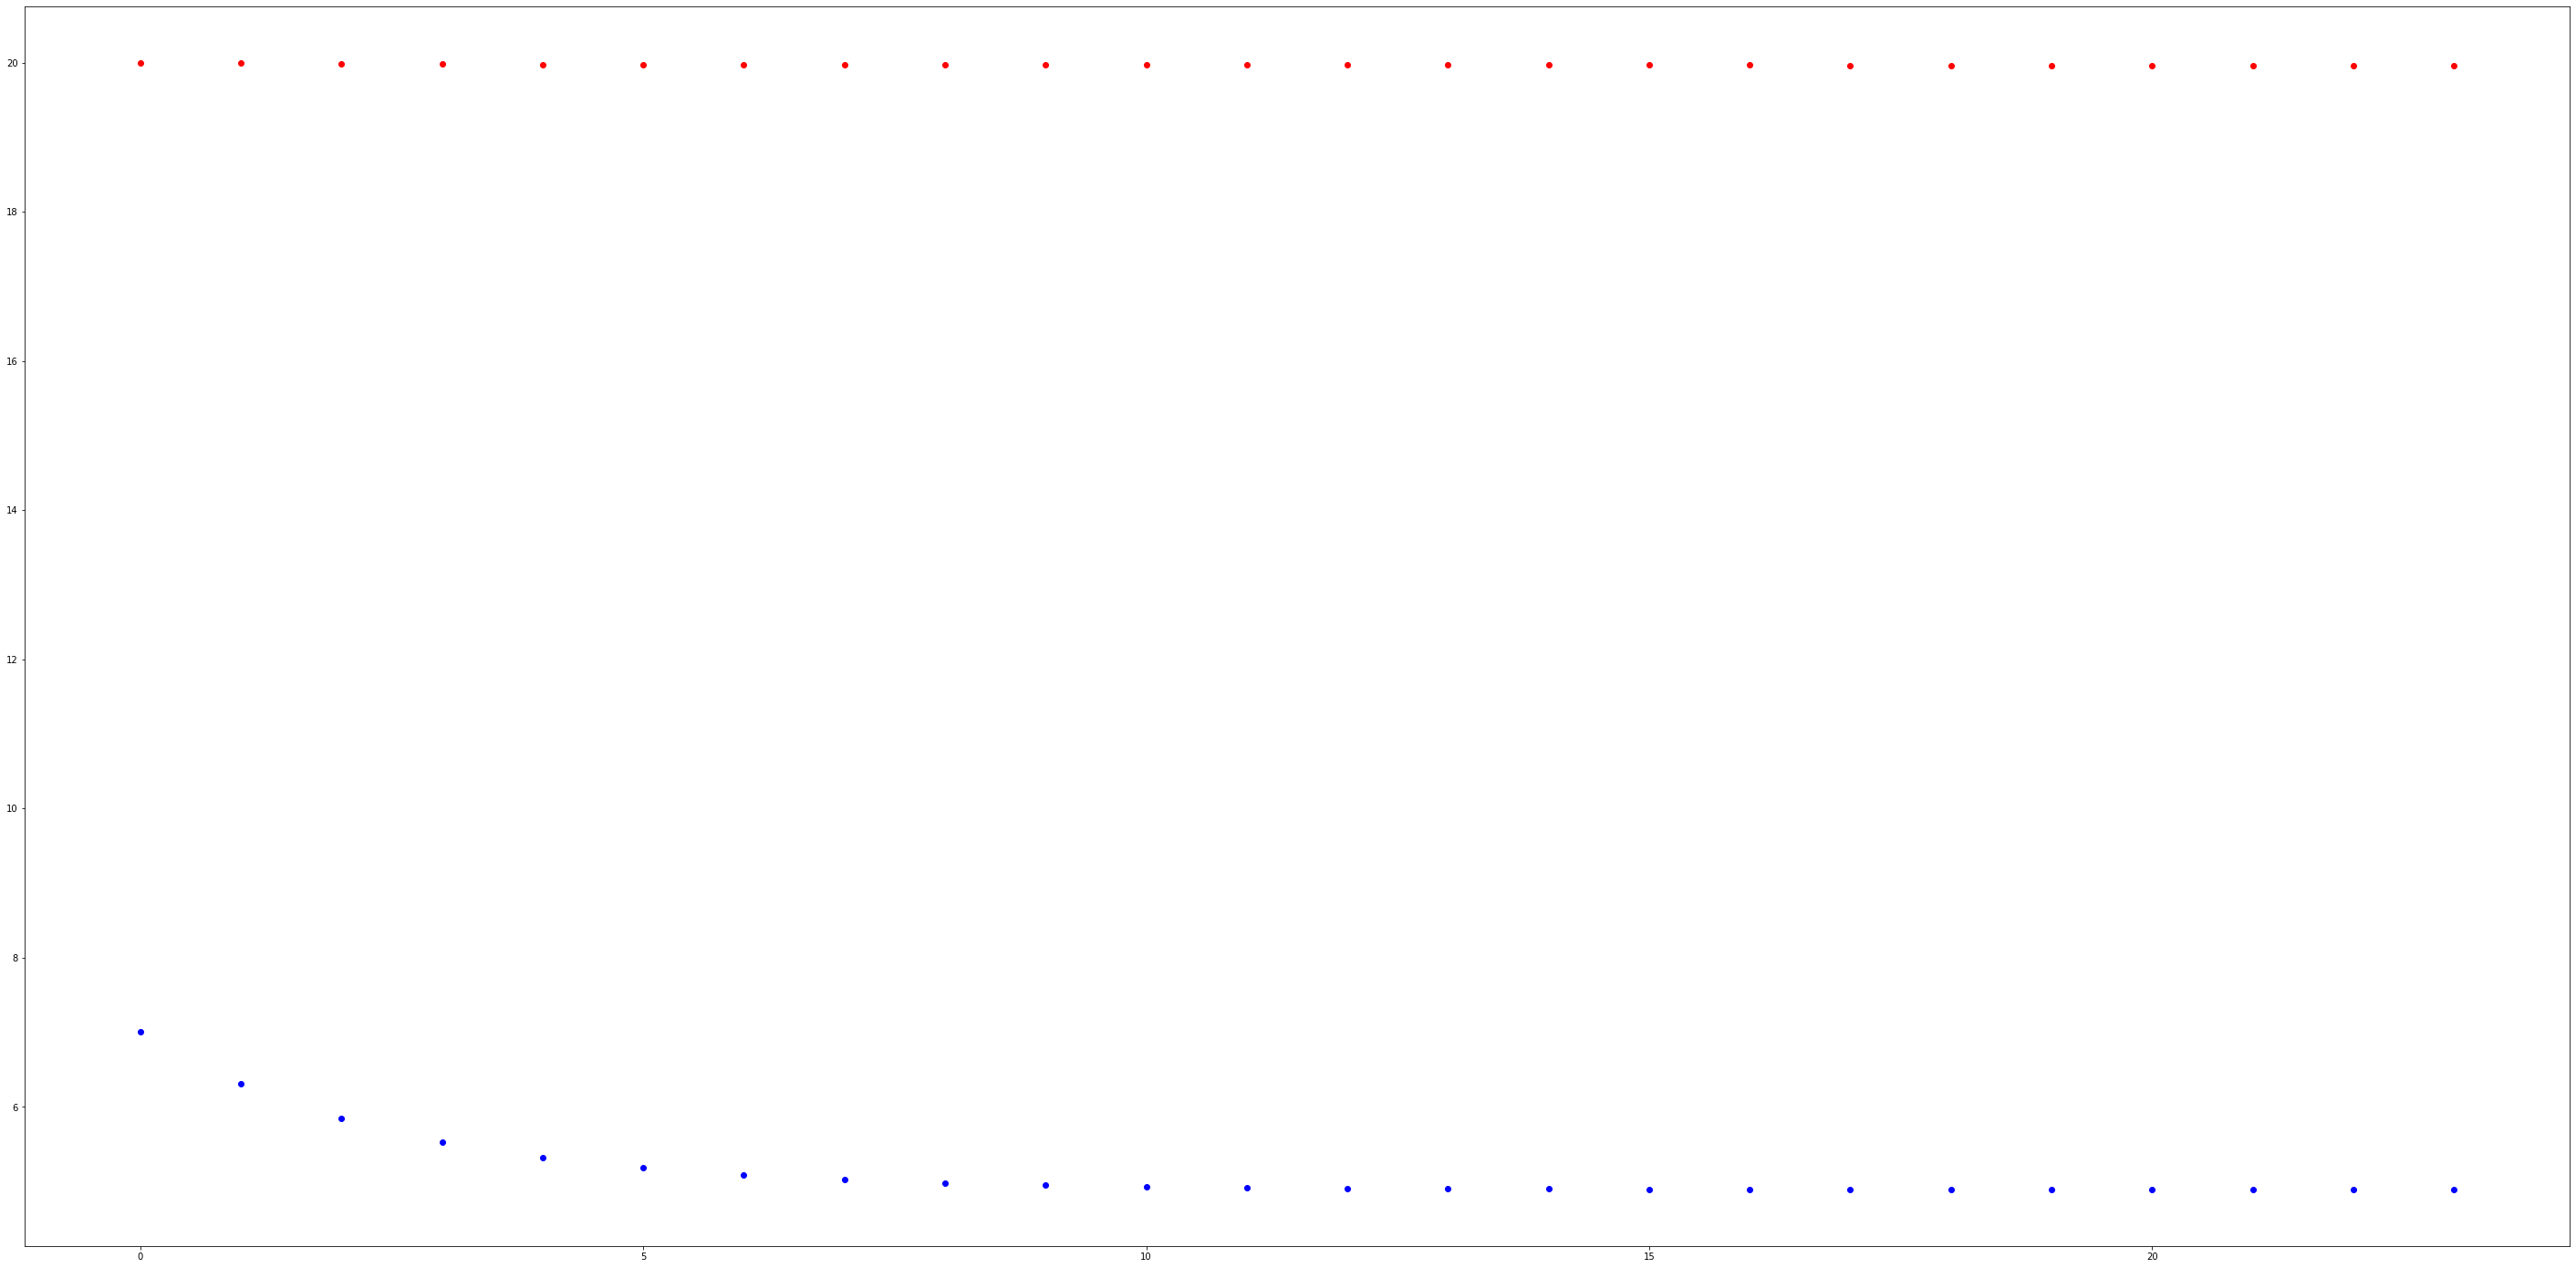

In [0]:
make_plot([(step_count_to_theta_0, "scatter", "red"), (step_count_to_theta_1, "scatter", "blue")])
show_plot()